<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Canales%20de%20Youtube/Python%20Engineer/PCA_(Principal_Component_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA (Principal Component Analysis)**

El objetivo principal con este metodo es definir una nueva dimension para el set de datos (siendo estas nuevas dimensiones ortogonales y por tanto independientes).

**Varianza**

$$
var(X) = \frac{1}{n} \sum (X_{i} - \bar{X})^2
$$

**Matriz de Covarianzas**

$$
Cov(X, Y) = \frac{1}{n} \sum (X_{i} - \bar{X})(Y_{i} - \bar{Y})^T
$$

$$
Cov(X, X) = \frac{1}{n} \sum (X_{i} - \bar{X})(X_{i} - \bar{X})^T
$$

**Valores y Vectores Propios**

Los vectores propios apuntan en la direccion donde se genera la maxima varianza y el correspondiente valor propio indica el grado de importancia del vector.

$$
A \vec{v} = λ \vec{v}
$$

**Metodo**
- Sustraer al vector X su media.
- Calcular la Cov(X, X)
- Calcular los vectores y valores propios de las matrices de covarianza
- Ordenar los vectores propios segun su importancia (en base a su valor propio) en orden decreciente
- Escoger los primeros k vectores propios y estos pasaran a ser las nuevas k dimensiones
- Por ultimo, transformar (proyectar) los datos en las nuevas dimensiones (esto se hace con un producto punto)

## **Programando el algoritmo desde cero**

In [1]:
# Importamos las bibliotecas
import numpy as np

In [8]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    # Calculamos el promedio
    self.mean = np.mean(X, axis=0)
    X = X - self.mean

    # Calculamos la covarianza (matriz de covarianza)
    cov = np.cov(X.T)

    # Calculamos los valores y vectores propios
    val_propios, vec_propios = np.linalg.eig(cov)

    # Ordenamos los vectores propios
    vec_propios = vec_propios.T 
    idxs = np.argsort(val_propios)[::-1] # Esto ultimo para ordenar de manera decreciente
    val_propios = val_propios[idxs]
    vec_propios = vec_propios[idxs]

    # Guardar los primeros k dimensiones
    self.components = vec_propios[0:self.n_components]

  def transform(self, X):
    # Proyectamos los datos
    X = X - self.mean
    return np.dot(X, self.components.T)


## **Ahora vamos a probar el algoritmo**

In [3]:
# Importamos bibliotecas
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


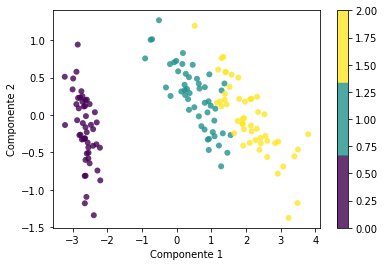

In [10]:
# Caragamos los datos
data = datasets.load_iris()
X = data.data 
y = data.target 

# proyectamos los datos en las primeros dos componentes
pca = PCA(2)
pca.fit(X)
X_proyected = pca.transform(X)

# Ahora veamos estas proyecciones en un grafico
x1 = X_proyected[:, 0]
x2 = X_proyected[:, 1]

plt.scatter(x1, x2, c=y, edgecolors='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar()
plt.show()




## **Probemos ahora desde la biblioteca de sklearn**

In [11]:
# Importamos el algoritmo
from sklearn.decomposition import PCA as PCA_sk

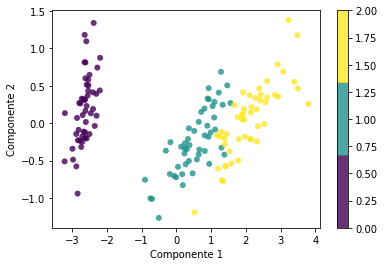

In [12]:
# Cargamos el algortimo con los datos y le pedimos reducir a 2 dimensiones
pca_sk = PCA_sk(n_components=2)
pca_sk.fit(X)

# Luego repetimos los mismo pasos para generar la visualizacion
X_proyected_sk = pca_sk.transform(X)

# Ahora veamos estas proyecciones en un grafico
x1 = X_proyected_sk[:, 0]
x2 = X_proyected_sk[:, 1]

plt.scatter(x1, x2, c=y, edgecolors='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar()
plt.show()
